## What is SQL, anyway?

'SQL' stands for 'Structured Query Language', a language used to interact with what are known as relational databases. 

You may have heard of MySQL or Postrgres, and are asking yourself, "What's the difference?" To be clear, they are all leveraging the SQL language. The only difference is the medium by which you are storing your data and calling it using that language. 

For the purposes of this training, we are going to use SQLite – you are still learning the SQL language, but we are using this particular medium because it allows us to easily do so from a Jupyter Notebook. 

__The data used in this tutorial comes from BlastChar, and can be found on Kaggle (https://www.kaggle.com/blastchar/telco-customer-churn). I highly suggest you take a look at the linked page to better understand the origins of the data before delving into the SQL commands.__

---

## Let's jump in!

Remember, SQLite3 lets us run SQL scripts and work directly with our results via Jupyter Notebook. We're still using the SQL language, just via a different medium. 

There are a few things we need to do in order to leverage SQLite3: 

> 1. Import the sqlite3 library
> 2. Connect to our database file
> 3. Create a 'cursor' (which lets you run queries)
> 4. Execute our SQL query
> 5. Store the results and column names 
> 6. Closer our database cursor and connetion

In [ ]:
import sqlite3 # import the SQLite3 library
from pandas import DataFrame, read_sql

In [ ]:
import os

os.chdir(r'/Users/siegmanA/Desktop/CDPTrainings/SQL') # point to my local directory
db_location = r'/Users/siegmanA/Desktop/CDPTrainings/SQL/TelcoSQL' # setup location variables for the database
db_connect = sqlite3.connect(db_location) # create the connection

In [ ]:
db_cursor = db_connect.cursor() # create cursor

In [ ]:
sql = "SELECT * FROM Telco1 LIMIT 1;"
df = read_sql(sql,db_connect)
df.head()

In [ ]:
sql = "SELECT * FROM Telco1 LIMIT 100;"
df = read_sql(sql,db_connect)
df

In [ ]:
sql = "SELECT * FROM Telco2 LIMIT 100;"
df = read_sql(sql,db_connect)
df

### There are a few commonly used statements, and they're all pretty self-explanatory: 

> CREATE TABLE creates a new table <br>
> INSERT INTO adds a new row to a table <br>
> SELECT lets you query data from a table <br>
> ALTER TABLE lets you make changes to an existing table <br>
> UPDATE lets you edit a row in a table <br>
> DELETE FROM lets you delete a row from a table <br>

## SELECT

>SELECT column1, column2 <br>
>FROM table_name

In [ ]:
sql = "SELECT customerID, TotalCharges FROM Telco1;"
df = read_sql(sql,db_connect)
df.head()

## AS

AS lets you rename a column or table using an alias. It's important to note that the column or table isn't being renamed permanently, and the aliases only appear in the result. 

In [ ]:
sql = "SELECT customerID, TotalCharges AS Charges FROM Telco1;"
df = read_sql(sql,db_connect)
df.head()

## DISTINCT

Distinct is used to return unique values in the output; it fitlers duplicate values from the specified columns. 

In [ ]:
sql = "SELECT DISTINCT customerID, TotalCharges FROM Telco1;"
df = read_sql(sql,db_connect)
df.head()

## WHERE

WHERE lets us filter for only the information we want in a query.

In [ ]:
sql = "SELECT customerID, TotalCharges FROM Telco1 WHERE TotalCharges > 1000.00;"
df = read_sql(sql,db_connect)
df.head()

### You'll notice that this didn't work, and that's because the TotalCharges are being stored as strings, not as integers. Thus, the '>' operator isn't working. Lucky for us, we can change that! 

In [ ]:
"""

# Normally, we could use 'ALTER TABLE' but SQLite doesn't support it. 

db_cursor.execute('ALTER TABLE Telco1 ALTER COLUMN TotalCharges int;') 

results_data = db_cursor.fetchall()
results_headers = db_cursor.description 

print("results column names ==>","\n",results_headers,"\n")
print("results data ==>","\n",results_data)

# So, we are going to cheat and just alter the original table. 

"""

## LIKE

Like lets you compare similar values; it's like WHERE but you aren't searching for a literal pattern. For instance, if we don't know the exact CustomerID of interest, but we know it start's with 4667:

In [ ]:
sql = "SELECT customerID, TotalCharges FROM Telco1 WHERE customerID LIKE '7590%';" # the '%' is a wildcard
df = read_sql(sql,db_connect)
df.head()

## IS NULL

Often times you will have missing data values. You can use IS NULL and IS NOT NULL to search for / avoid those values

In [ ]:
sql = "SELECT customerID, TotalCharges FROM Telco1 WHERE OnlineSecurity IS NULL;" # the '%' is a wildcard
df = read_sql(sql,db_connect)
df.head()

## BETWEEN

BETWEEN can be used in a WHERE clause to filter the result set within a range of numbers, texts, or dates

In [ ]:
sql = "SELECT customerID, TotalCharges FROM Telco1 WHERE TotalCharges BETWEEN 1000 and 2000;" # the '%' is a wildcard
df = read_sql(sql,db_connect)
df.head()

## AND 

AND lets you combine multiple conditions in a WHERE clause

In [ ]:
sql = "SELECT customerID, TotalCharges, OnlineSecurity FROM Telco1 WHERE TotalCharges BETWEEN 1000 and 2000 AND OnlineSecurity == 'Yes';" # the '%' is a wildcard
df = read_sql(sql,db_connect)
df.head()

## OR

OR can also be used in conjunction with a WHERE clause, and will display the result if _either_ of the conditions are true. 

In [ ]:
sql = "SELECT customerID, TotalCharges, OnlineSecurity FROM Telco1 WHERE TotalCharges BETWEEN 1000 and 2000 OR OnlineSecurity == 'Yes';" # the '%' is a wildcard
df = read_sql(sql,db_connect)
df.head()

## ORDER BY

ORDER BY lets you list your result set in a particular order, either alphabetically or numerically

In [ ]:
sql = "SELECT customerID, TotalCharges FROM Telco1 WHERE TotalCharges > 2000 ORDER BY TotalCharges" # the '%' is a wildcard
df = read_sql(sql,db_connect)
df.head()

## LIMIT

LIMIT lets us limit the number of values returned in our result set

In [ ]:
sql = "SELECT customerID, TotalCharges FROM Telco1 WHERE TotalCharges > 2000 ORDER BY TotalCharges LIMIT 5;" # the '%' is a wildcard
df = read_sql(sql,db_connect)
df.head()

## BASIC FUNCTIONS 

1. COUNT() takes the name of a column as an argument and counts the number of non-empty values in that column
2. SUM() takes the name of a column as an argument and returns the sum of all the values in that column
3. MAX() / MIN() return the highest / lowest values in a column
4. AVERAGE() takes a column name as an argument and returns the average value for that column
5. ROUND() takes the column name and an integer as arguments, and rounds the values in the column to the number of decimal places specified by the integer

## GROUP BY 

In [ ]:
sql = "SELECT InternetService, AVG(TotalCharges) FROM Telco1 GROUP BY InternetService;" 
df = read_sql(sql,db_connect)
df

## HAVING

In [ ]:
sql = "SELECT InternetService, AVG(TotalCharges) FROM Telco1 GROUP BY InternetService HAVING AVG(TotalCharges) > 1000;" 
df = read_sql(sql,db_connect)
df.head()

## -- TABLE JOINS --

In [ ]:
# Example of an Inner Join (descriped in more detail below)

sql = "SELECT *FROM Telco1 JOIN Telco2 ON Telco1.customerID = Telco2.customerID;" 
df = read_sql(sql,db_connect)
df.head()

## INNER JOIN

An inner join will only include rows that match our 'ON' condition. Check out this animation from CodeAcademy (https://www.codecademy.com/courses/learn-sql/lessons/multiple-tables/exercises/inner-join-ii?action=resume_content_item):

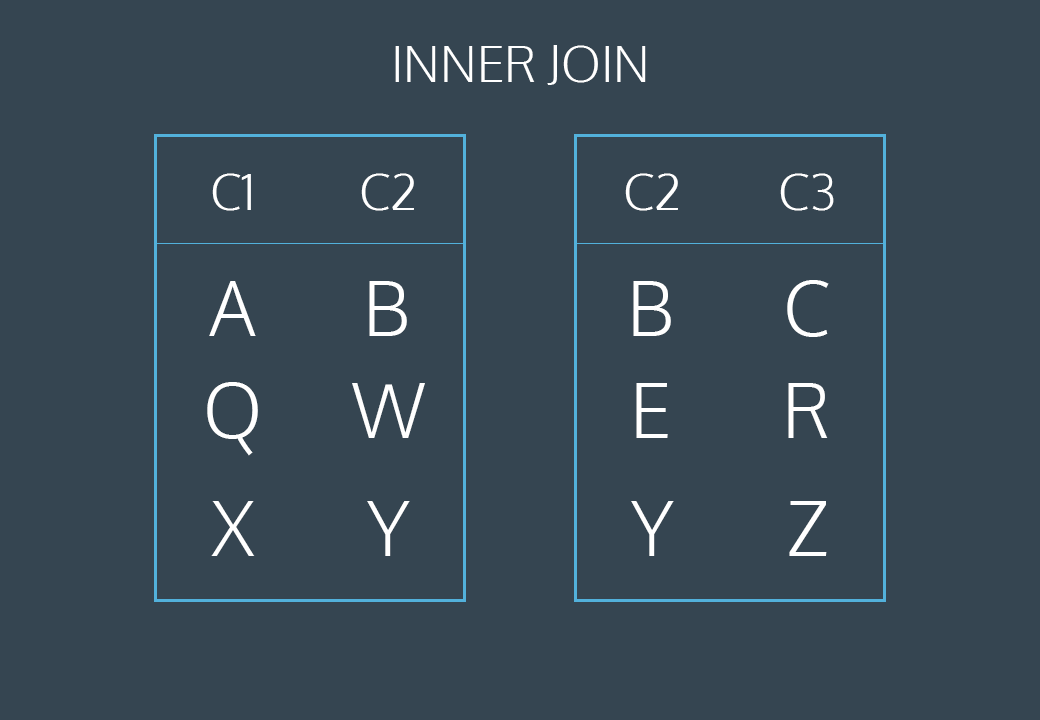

## LEFT JOIN

A left join will keep all rows from the first table, regardless of whether there is a matching row in the second table. 

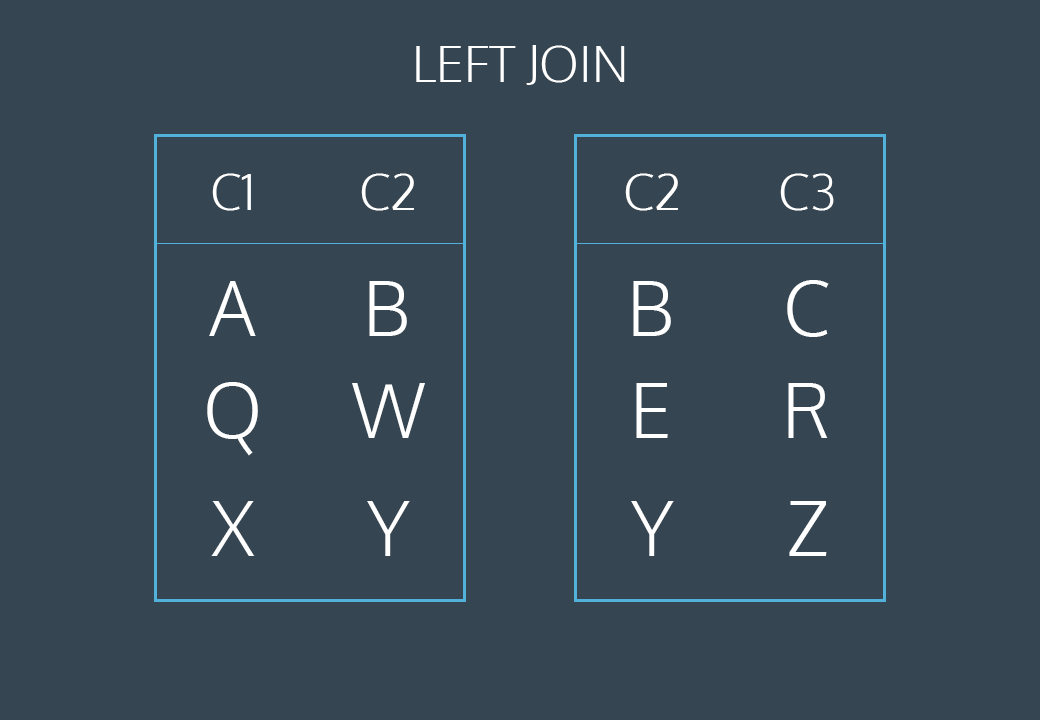

In [ ]:
# An example of a left join

sql = "SELECT * FROM Telco1 LEFT JOIN Telco2 ON Telco1.customerID = Telco2.StreamingTV" 
df = read_sql(sql,db_connect)
df.head()

In [ ]:
sql = "SELECT * FROM Telco2 LEFT JOIN Telco1 ON Telco2.StreamingTV = Telco1.customerID;" 
df = read_sql(sql,db_connect)
df.head()

## CROSS JOIN

Cross Join allows us to combine all rows of one table with all rows of another table. 

In [ ]:
sql = "SELECT * FROM Telco1 CROSS JOIN Telco2 WHERE StreamingTV = 'Yes';" 
df = read_sql(sql,db_connect)
df.head()

## UNION

Simply put, Union allows you to stack one dataset on top of another 

In [ ]:
sql = "SELECT * FROM Telco1 UNION SELECT * FROM Telco2" 
df = read_sql(sql,db_connect)
df.head()

## WITH

WITH allows us to perform an independent query and join the result with another table

In [ ]:
sql = ("WITH query AS (SELECT customerID, AVG(TotalCharges) as AvgCharges FROM Telco1 GROUP BY customerID) SELECT Telco1.customerID, query.AvgCharges FROM query JOIN Telco1 ON Telco1.customerID = query.customerID;") 
#SELECT customerID, query.AvgCharges FROM query JOIN Telco1 ON Telco1.customerID = query.customerID;" 
df = read_sql(sql,db_connect)
df

In [ ]:
db_cursor.close()
db_connect.close()